In [1]:
# 自己来定义列名
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

label_dict = {i:label for i,label in zip(
                range(1,4),
                  ('Setosa',
                  'Versicolor',
                  'Virginica'
                 ))}
import pandas as pd
# 数据读取，大家也可以先下载下来直接读取
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
# 指定列名
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']

df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<img src="1.png" alt="FAO" width="690" align="left">

In [2]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = df['class label'].values

# 制作标签{1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

<img src="2.png" alt="FAO" width="290" align="left">

### 分别求三种鸢尾花数据在不同特征维度上的均值向量 mi
<img src="3.png" alt="FAO" width="390">

In [3]:
import numpy as np
#设置小数点的位数
np.set_printoptions(precision=4) 
#这里会保存所有的均值
mean_vectors = []
# 要计算3个类别
for cl in range(1,4):
    # 求当前类别各个特征均值
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('均值类别 %s: %s\n' %(cl, mean_vectors[cl-1]))

均值类别 1: [5.006 3.418 1.464 0.244]

均值类别 2: [5.936 2.77  4.26  1.326]

均值类别 3: [6.588 2.974 5.552 2.026]



### 计算两个 4×4 维矩阵：类内散布矩阵和类间散布矩阵
-  <img src="5.png" alt="FAO" width="330" >


In [4]:
# 原始数据中有4个特征
S_W = np.zeros((4,4))
# 要考虑不同类别，自己算自己的
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))    
    # 选中属于当前类别的数据
    for row in X[y == cl]:
        # 这里相当于对各个特征分别进行计算，用矩阵的形式
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        # 跟公式一样
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             
print('类内散布矩阵:\n', S_W)

类内散布矩阵:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


-  <img src="6.png" alt="FAO" width="430" >

In [5]:
# 全局均值
overall_mean = np.mean(X, axis=0)
# 构建类间散布矩阵
S_B = np.zeros((4,4))
# 对各个类别进行计算
for i,mean_vec in enumerate(mean_vectors):  
    #当前类别的样本数
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) 
    overall_mean = overall_mean.reshape(4,1) 
    # 如上述公式进行计算
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('类间散布矩阵:\n', S_B)

类间散布矩阵:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


-  <img src="7.png" alt="FAO" width="230" >

In [6]:
#求解矩阵特征值，特征向量
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# 拿到每一个特征值和其所对应的特征向量
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\n特征向量 {}: \n{}'.format(i+1, eigvec_sc.real))
    print('特征值 {:}: {:.2e}'.format(i+1, eig_vals[i].real))


特征向量 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
特征值 1: 3.23e+01

特征向量 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
特征值 2: 2.78e-01

特征向量 3: 
[[ 0.1056]
 [ 0.2524]
 [ 0.3146]
 [-0.7526]]
特征值 3: 1.10e-15

特征向量 4: 
[[ 0.1056]
 [ 0.2524]
 [ 0.3146]
 [-0.7526]]
特征值 4: 1.10e-15


### 特征值与特征向量：
- 特征向量：表示映射方向
- 特征值：特征向量的重要程度

In [7]:
#特征值和特征向量配对
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# 按特征值大小进行排序
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

print('特征值排序结果:\n')
for i in eig_pairs:
    print(i[0])

特征值排序结果:

32.27195779972978
0.27756686384005025
5.093285443027438e-15
5.093285443027438e-15


In [8]:
print('特征值占总体百分比:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('特征值 {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

特征值占总体百分比:

特征值 1: 99.15%
特征值 2: 0.85%
特征值 3: 0.00%
特征值 4: 0.00%


选择前两维特征

In [9]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('矩阵W:\n', W.real)

矩阵W:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


In [10]:
# 执行降维操作
X_lda = X.dot(W)
X_lda.shape

(150, 2)

原始数据可视化展示

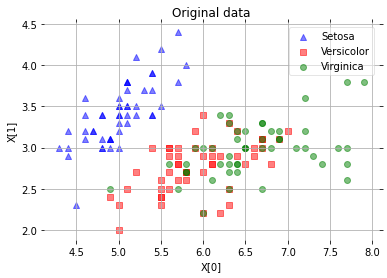

In [11]:
from matplotlib import pyplot as plt
# 可视化展示
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
                y=X[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('X[0]')
    plt.ylabel('X[1]')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('Original data')

    # 把边边角角隐藏起来
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # 为了看的清晰些，尽量简洁
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

降维后数据可视化展示

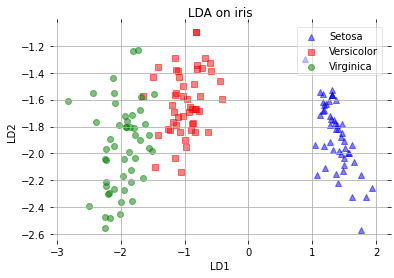

In [12]:
from matplotlib import pyplot as plt
# 可视化展示
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA on iris')

    # 把边边角角隐藏起来
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # 为了看的清晰些，尽量简洁
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [14]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()


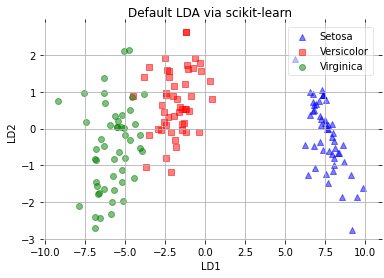

In [15]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')